In [9]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [30]:
import os
import numpy as np
import pandas as pd
import random as rnd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

import keras
from keras.models import Sequential
from keras.utils import to_categorical
from keras.preprocessing.image import load_img
from keras.layers import Flatten, Dense, Dropout
from keras.layers import Conv2D, MaxPool2D, BatchNormalization, Activation

from tensorflow.keras.preprocessing.image import ImageDataGenerator

print(os.listdir("/kaggle/input/dogs-vs-cats"))

['sampleSubmission.csv', 'test1', 'train']


In [31]:
FAST_RUN = False
IMAGE_WIDTH=128
IMAGE_HEIGHT=128
IMAGE_CHANNELS=3
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)



In [33]:
train_images = os.listdir("/kaggle/input/dogs-vs-cats/train/train")
CATEGORIES = []

for image_name in train_images:
    class_name = image_name.split('.')[0]  # cat.588.jpg
    CATEGORIES.append(0 if class_name=='cat' else 1)

df = pd.DataFrame({"train_images": train_images, "CATEGORIES": CATEGORIES})

In [34]:
fig = plt.gcf()
fig.set_size_inches(16, 16)

<Figure size 1600x1600 with 0 Axes>

In [35]:
df.head()

train_images  CATEGORIES
0  cat.12461.jpg           0
1   dog.3443.jpg           1
2   dog.7971.jpg           1
3  dog.10728.jpg           1
4   dog.1942.jpg           1

In [36]:
df.tail()

train_images  CATEGORIES
24995  cat.3664.jpg           0
24996  dog.1783.jpg           1
24997  dog.9392.jpg           1
24998  dog.1631.jpg           1
24999  dog.6938.jpg           1

In [37]:
df.describe()

CATEGORIES
count  25000.00000
mean       0.50000
std        0.50001
min        0.00000
25%        0.00000
50%        0.50000
75%        1.00000
max        1.00000

In [38]:
df["CATEGORIES"].value_counts()

CATEGORIES
0    12500
1    12500
Name: count, dtype: int64

<Axes: xlabel='CATEGORIES'>

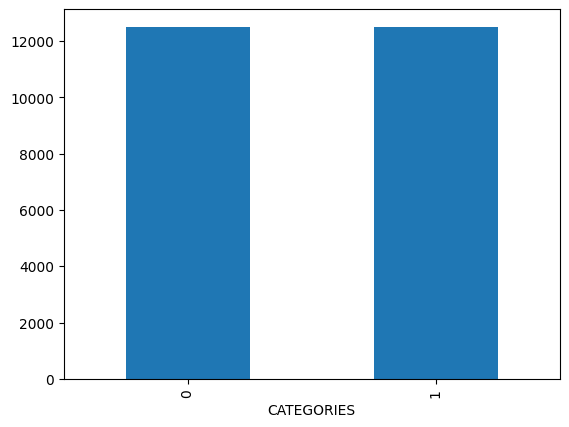

In [39]:
df["CATEGORIES"].value_counts().plot.bar()

there are 12500 cats and 12500 dogs

In [41]:
shapes = []

for image in df["train_images"]:
    path = os.path.join("/kaggle/input/dogs-vs-cats/train/train",image)
    image_array = plt.imread(path)
    shapes.append(image_array.shape)
    
print(pd.Series(shapes).value_counts())

index = np.argmin(shapes)
print(f"\nThe Minimum Dimension is ==> {shapes[index]}\n")

(374, 500, 3)    2955
(375, 499, 3)    2912
(499, 375, 3)     261
(333, 499, 3)     229
(500, 374, 3)     227
                 ... 
(200, 150, 3)       1
(299, 202, 3)       1
(448, 248, 3)       1
(281, 220, 3)       1
(231, 310, 3)       1
Name: count, Length: 8513, dtype: int64

The Minimum Dimension is ==> (359, 499, 3)



<class 'PIL.JpegImagePlugin.JpegImageFile'>


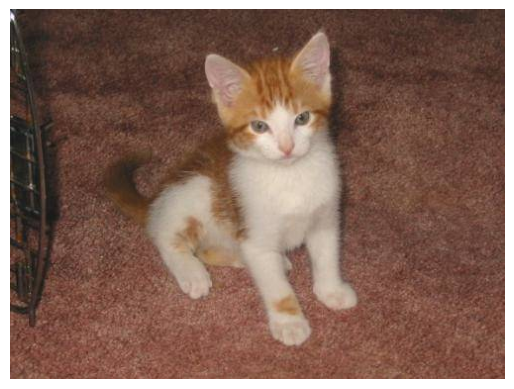

In [43]:
sample = rnd.choice(train_images)
image = load_img(os.path.join("/kaggle/input/dogs-vs-cats/train/train", sample))
print(type(image))
plt.imshow(image)
plt.axis("off")
plt.show()

In [44]:
df["CATEGORIES"] = df["CATEGORIES"].replace({0: 'cat', 1: 'dog'})

In [45]:
train_df, valid_df = train_test_split(df, test_size=0.20, random_state=42)

train_df = train_df.reset_index(drop=True)
valid_df = valid_df.reset_index(drop=True)

In [46]:
train_df['CATEGORIES'].value_counts()

CATEGORIES
dog    10001
cat     9999
Name: count, dtype: int64

<Axes: xlabel='CATEGORIES'>

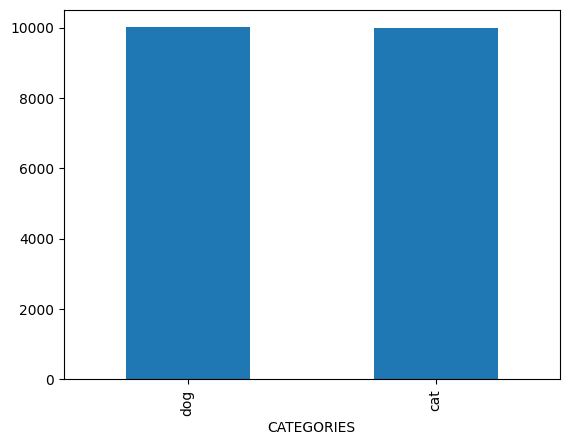

In [47]:
train_df['CATEGORIES'].value_counts().plot.bar()

In [48]:
valid_df['CATEGORIES'].value_counts()

CATEGORIES
cat    2501
dog    2499
Name: count, dtype: int64

<Axes: xlabel='CATEGORIES'>

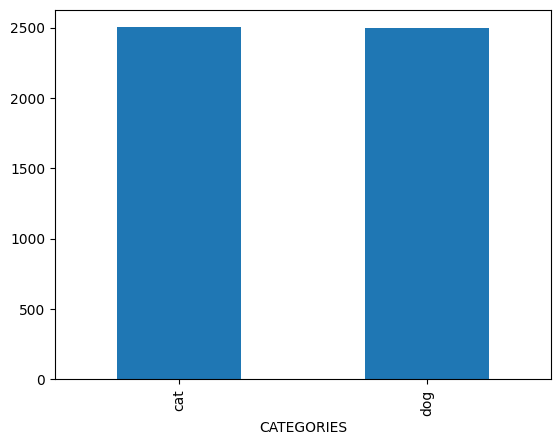

In [49]:
valid_df['CATEGORIES'].value_counts().plot.bar()

In [51]:
total_train = train_df.shape[0]
total_validate = valid_df.shape[0]
batch_size=15

In [52]:
df.head()

train_images CATEGORIES
0  cat.12461.jpg        cat
1   dog.3443.jpg        dog
2   dog.7971.jpg        dog
3  dog.10728.jpg        dog
4   dog.1942.jpg        dog

In [54]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    "/kaggle/input/dogs-vs-cats/train/train", 
    x_col='train_images',
    y_col='CATEGORIES',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 20000 validated image filenames belonging to 2 classes.


In [56]:
valid_datagen = ImageDataGenerator(rescale=1./255)

valid_generator = valid_datagen.flow_from_dataframe(
    valid_df, 
    "/kaggle/input/dogs-vs-cats/train/train", 
    x_col='train_images',
    y_col='CATEGORIES',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 5000 validated image filenames belonging to 2 classes.


In [58]:
example_df = train_df.sample(n=1) # take 1 image-sample
print(example_df, "\n")

example_df= example_df.reset_index(drop=True)
print(example_df, "\n")

example_generator = train_datagen.flow_from_dataframe(
    example_df, 
    "/kaggle/input/dogs-vs-cats/train/train", 
    x_col='train_images',
    y_col='CATEGORIES',
    target_size=IMAGE_SIZE,
    class_mode='categorical'
)

       train_images CATEGORIES
10670  dog.6160.jpg        dog 

   train_images CATEGORIES
0  dog.6160.jpg        dog 

Found 1 validated image filenames belonging to 1 classes.


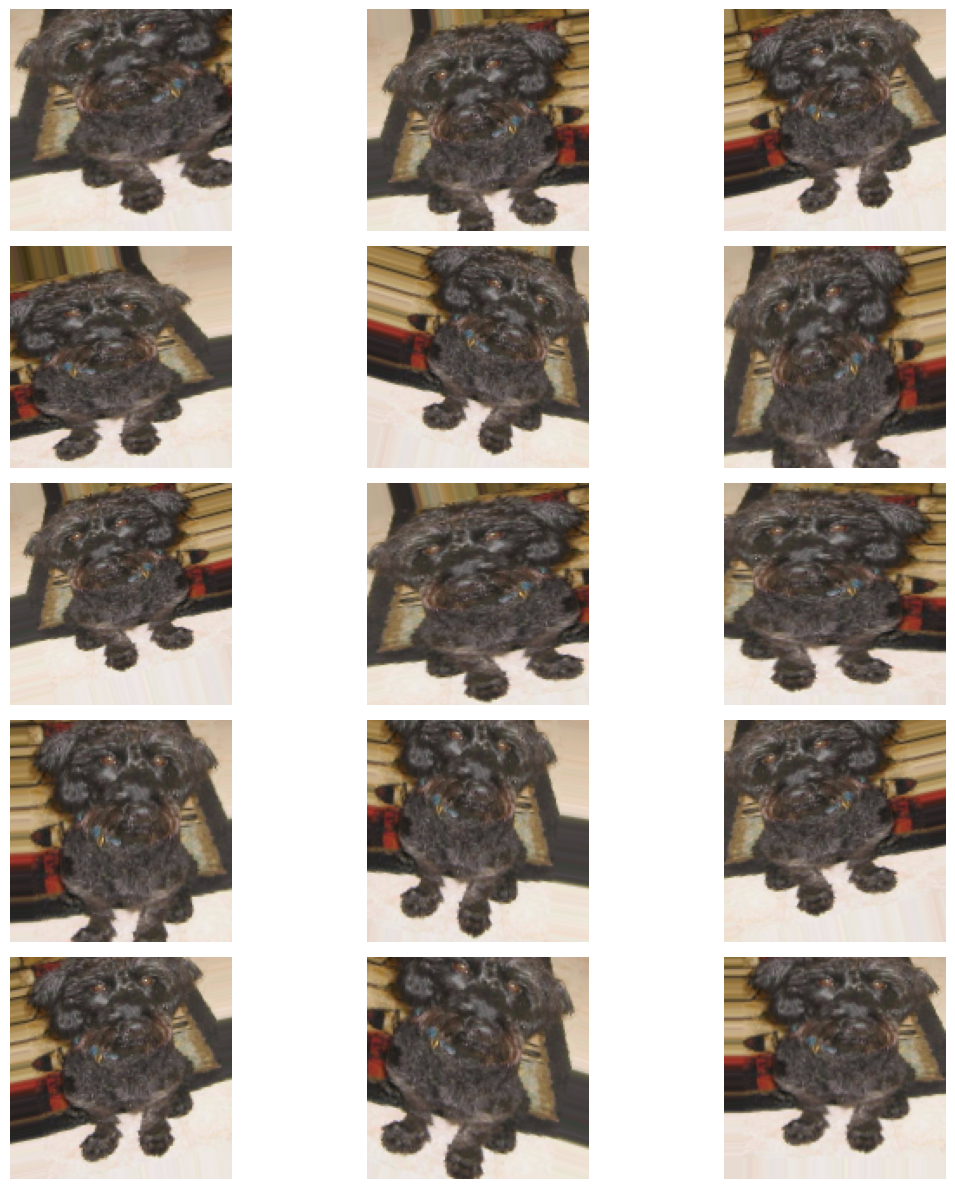

In [59]:
plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in example_generator:
        image = X_batch[0]
        plt.imshow(image)
        plt.axis('off')
        break
plt.tight_layout()
plt.show()

In [60]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)),
#     BatchNormalization(),
    MaxPool2D(pool_size=(4,4)),
    Dropout(rate=0.25),
    
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPool2D(pool_size=(4,4)),
    Dropout(rate=0.25),
    
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPool2D(pool_size=(4,4)),
    Dropout(rate=0.25),
    
    Flatten(),
    
    Dense(512, activation='relu'),
    Dropout(rate=0.5),

    Dense(2, activation='softmax') # 2 because we have cat and dog classes

])

# Compile
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Summary of Model
model.summary()


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 29, 29, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 5, 5, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 5, 5, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 161,090 (629.26 KB)

 Trainable params: 160,706 (627.76 KB)

 Non-trainable params: 384 (1.50 KB)

In [61]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [62]:
earlystop = EarlyStopping(patience=5)

In [63]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]

In [64]:
epochs = 3 if FAST_RUN else 10

history = model.fit(train_generator,
                    epochs=epochs,
                    validation_data=valid_generator,
#                     validation_steps=total_validate//batch_size, # 5000//15  = 333
#                     steps_per_epoch=total_train//batch_size,     # 20000//15 = 1333
                    callbacks=callbacks)

Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1334/1334 ━━━━━━━━━━━━━━━━━━━━ 232s 171ms/step - accuracy: 0.5394 - loss: 0.8333 - val_accuracy: 0.5108 - val_loss: 0.8243 - learning_rate: 0.0010
Epoch 2/10


/opt/conda/lib/python3.10/site-packages/keras/src/callbacks/callback_list.py:96: UserWarning: Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss,learning_rate.
  callback.on_epoch_end(epoch, logs)


1334/1334 ━━━━━━━━━━━━━━━━━━━━ 230s 172ms/step - accuracy: 0.5858 - loss: 0.6772 - val_accuracy: 0.5512 - val_loss: 0.7741 - learning_rate: 0.0010
Epoch 3/10
1334/1334 ━━━━━━━━━━━━━━━━━━━━ 230s 172ms/step - accuracy: 0.6124 - loss: 0.6593 - val_accuracy: 0.6446 - val_loss: 0.6922 - learning_rate: 0.0010
Epoch 4/10
1334/1334 ━━━━━━━━━━━━━━━━━━━━ 223s 167ms/step - accuracy: 0.6565 - loss: 0.6311 - val_accuracy: 0.5414 - val_loss: 0.8312 - learning_rate: 0.0010
Epoch 5/10
1334/1334 ━━━━━━━━━━━━━━━━━━━━ 222s 166ms/step - accuracy: 0.6927 - loss: 0.5872 - val_accuracy: 0.7104 - val_loss: 0.5525 - learning_rate: 0.0010
Epoch 6/10
1334/1334 ━━━━━━━━━━━━━━━━━━━━ 225s 168ms/step - accuracy: 0.7135 - loss: 0.5645 - val_accuracy: 0.6498 - val_loss: 0.6009 - learning_rate: 0.0010
Epoch 7/10
1334/1334 ━━━━━━━━━━━━━━━━━━━━ 225s 168ms/step - accuracy: 0.7290 - loss: 0.5395 - val_accuracy: 0.7054 - val_loss: 0.5780 - learning_rate: 0.0010
Epoch 8/10
1334/1334 ━━━━━━━━━━━━━━━━━━━━ 224s 167ms/step - acc

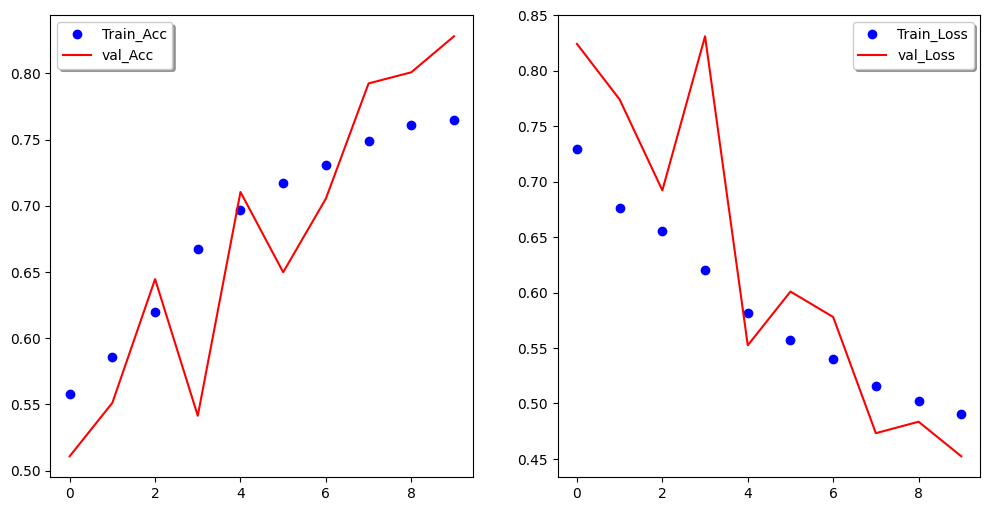

In [65]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]

loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(len(accuracy))

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.plot(epochs, accuracy, 'bo', label="Train_Acc")
plt.plot(epochs, val_accuracy, 'r', label="val_Acc")
plt.legend(loc='best', shadow=True)

plt.subplot(1,2,2)
plt.plot(epochs, loss, 'bo', label="Train_Loss")
plt.plot(epochs, val_loss, 'r', label="val_Loss")
plt.legend(loc='best', shadow=True)

plt.show()

In [68]:
test_file_names = os.listdir("/kaggle/input/dogs-vs-cats/test1/test1")
test_df = pd.DataFrame({'file_name': test_file_names})

total_testing = test_df.shape[0]

In [69]:
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    test_df, 
    "/kaggle/input/dogs-vs-cats/test1/test1", 
    x_col='file_name',
    y_col=None,
    class_mode=None,
    target_size=IMAGE_SIZE,
    batch_size=batch_size,
    shuffle=False
)

Found 12500 validated image filenames.


In [70]:
predictions = model.predict(test_generator)

834/834 ━━━━━━━━━━━━━━━━━━━━ 89s 107ms/step


In [71]:
test_df["CATEGORIES"] = np.argmax(predictions, axis=1)

In [72]:
label_map = dict((v,k) for k,v in train_generator.class_indices.items())
test_df['CATEGORIES'] = test_df['CATEGORIES'].replace(label_map)

In [73]:
test_df['CATEGORIES'] = test_df['CATEGORIES'].replace({ 'dog': 1, 'cat': 0 })

/tmp/ipykernel_24/3126904015.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_df['CATEGORIES'] = test_df['CATEGORIES'].replace({ 'dog': 1, 'cat': 0 })


<Axes: xlabel='CATEGORIES'>

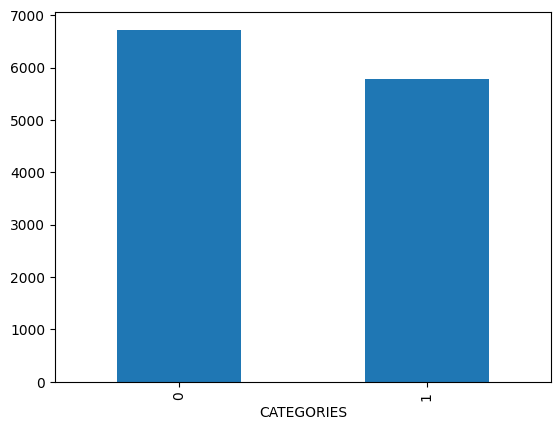

In [74]:
test_df["CATEGORIES"].value_counts().plot.bar()

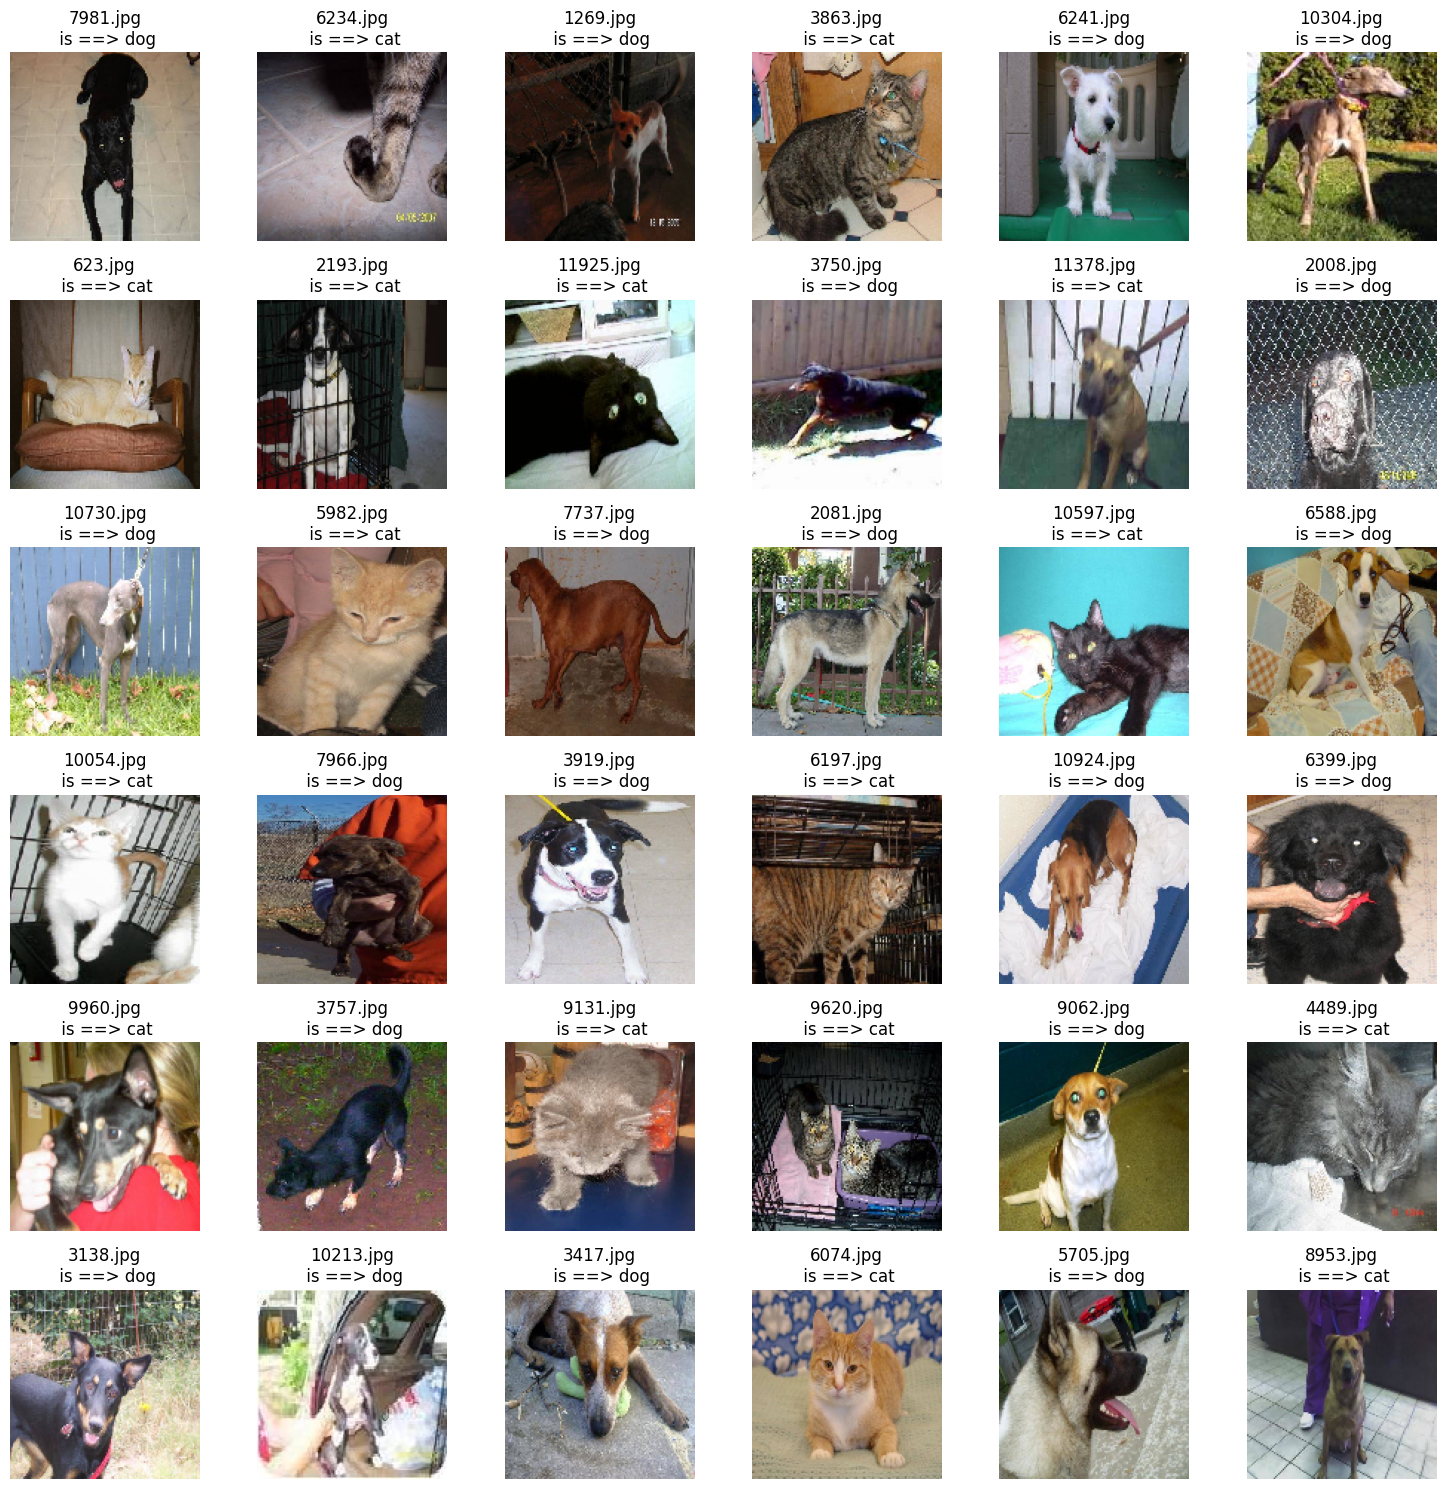

In [76]:
sample_test = test_df.head(36)

plt.figure(figsize=(15,15))

for index, row in sample_test.iterrows():
    file_name = row['file_name']
    category = row['CATEGORIES']
    path = os.path.join("/kaggle/input/dogs-vs-cats/test1/test1", file_name)
    img = load_img(path, target_size=IMAGE_SIZE)
    plt.subplot(6,6,index+1)
    plt.imshow(img)
    plt.title(f"{file_name}\n is ==> {'cat' if category==0 else 'dog'}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [77]:
model.save("CNNCAT.h5")
model.save_weights("CNNCAT.weights.h5")